# Implementation of BS formula

In [87]:
import numpy as np
from scipy.stats import norm
import pandas as pd
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, theta, vega, rho
import matplotlib.pyplot as plt

In [59]:
def option_pricing_BS(S,K,T,r,sigma, type):
    "Calculate BS option price for c cull/put"
    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2,0,1)
    elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
    return price

In [ ]:

def delta_BS(S, K, T, r, sigma, type):
   
    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    if type == "c":
        delta_calcul = norm.cdf(d1)  
    elif type == "p":
        delta_calcul = norm.cdf(d1) - 1  # or -norm.cdf(-d1)
       
    return delta_calcul


In [ ]:
def gamma_BS(S, K, T, r, sigma):
   
    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    gamma_calcul = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma_calcul

In [ ]:
def vega_BS(S, K, T, r, sigma):
    
    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    vega_calcul = S * norm.pdf(d1) * np.sqrt(T)
    return vega_calcul*0.01

In [81]:
def theta_BS(S, K, T, r, sigma, type):

    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if type == "c" :
        theta_calcul = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif type == 'p':
        theta_calcul = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    
    return theta_calcul/365

In [82]:
def rho_BS(S, K, T, r, sigma, type):
    d1 = ( np.log(S/K) + (r+sigma**2/2)*T ) /(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == "c" :
        rho_calcul = K*T*np.exp(-r * T) * norm.cdf(d2)
    elif type == 'p':
        rho_calcul = -K*T*np.exp(-r * T) * norm.cdf(-d2)
    return rho_calcul*0.01

In [ ]:
# Parameters
K = 200
sigma = 0.2
T = 240/365
r = 0.05
asset = np.linspace(100, 300, 400)

call_price=[]
put_price=[]
delta_call=[]
delta_put=[]
gamma_common=[]
vega_common=[]
theta_call = []
theta_put = []
rho_call = []
rho_put = []

for S in asset:
    call=option_pricing_BS( S, K, T, r,sigma, type="c")
    put=option_pricing_BS( S, K, T, r,sigma, type="p")
    delta_c = delta_BS(S, K, T, r, sigma, type="c")
    delta_p = delta_BS(S, K, T, r, sigma, type="p")
    gamma_option = gamma_BS(S, K, T, r, sigma)
    vega_option = vega_BS(S, K, T, r, sigma)
    theta_c = theta_BS(S, K, T, r, sigma, type="c")
    theta_p = theta_BS(S, K, T, r, sigma, type="p")
    rho_c = rho_BS (S, K, T, r, sigma, type="c")
    rho_p = rho_BS(S, K, T, r, sigma, type="p")

    call_price.append(call)
    put_price.append(put)
    delta_call.append(delta_c)
    delta_put.append(delta_p)
    gamma_common.append(gamma_option)
    vega_common.append(vega_option)
    theta_call.append(theta_c)
    theta_put.append(theta_p)
    rho_call.append(rho_c)
    rho_put.append(rho_p)




data = {
    "call_price": call_price,
    "put_price": put_price,
    "delta_call": delta_call,
    "delta_put": delta_put,
    "gamma_common": gamma_common,
    "vega_common": vega_common,
    "rho_call" : rho_call,
    "rho_put" : rho_put,
    "theta_call": theta_call, 
    "theta_put": theta_put
}

df = pd.DataFrame(data)
df['Stock price'] = asset
df = df.set_index('Stock price')
df.head()

,call_price,put_price,delta_call,delta_put,gamma_common,vega_common,rho_call,rho_put,theta_call,theta_put
S,,,,,,,,,,
100.000000,0.000117,93.531687,0.000033,-0.999967,0.000009,0.000113,0.000021,-1.272515,-0.000005,0.026506
100.501253,0.000135,93.030452,0.000038,-0.999962,0.000010,0.000128,0.000024,-1.272512,-0.000006,0.026505
101.002506,0.000155,92.529219,0.000043,-0.999957,0.000011,0.000145,0.000027,-1.272509,-0.000007,0.026505
101.503759,0.000177,92.027989,0.000048,-0.999952,0.000012,0.000165,0.000031,-1.272505,-0.000008,0.026504
102.005013,0.000203,91.526761,0.000055,-0.999945,0.000014,0.000186,0.000035,-1.272501,-0.000008,0.026503


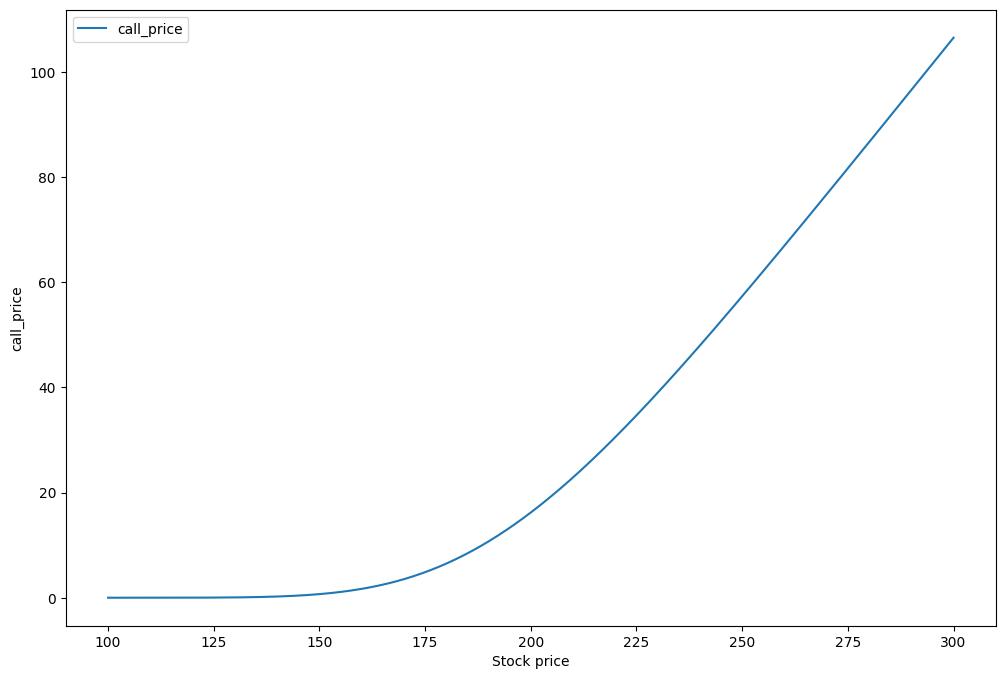

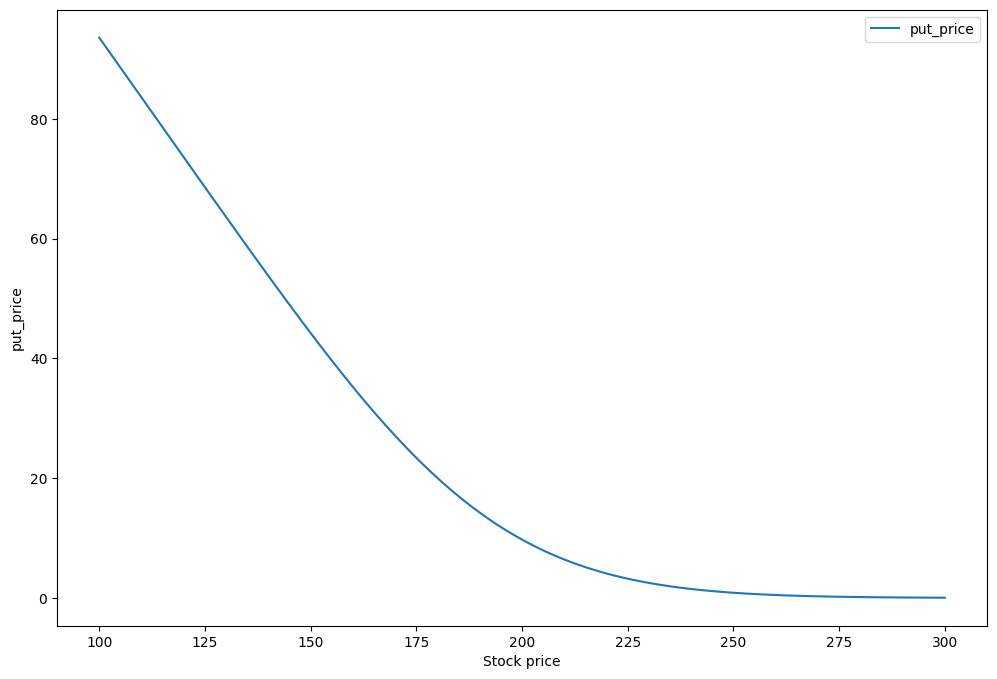

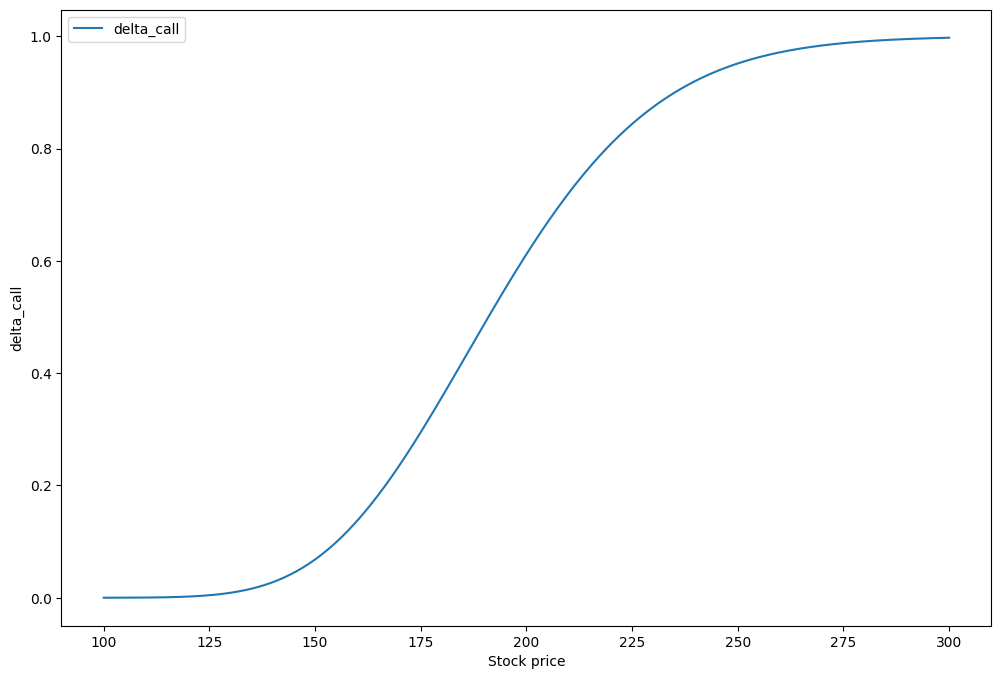

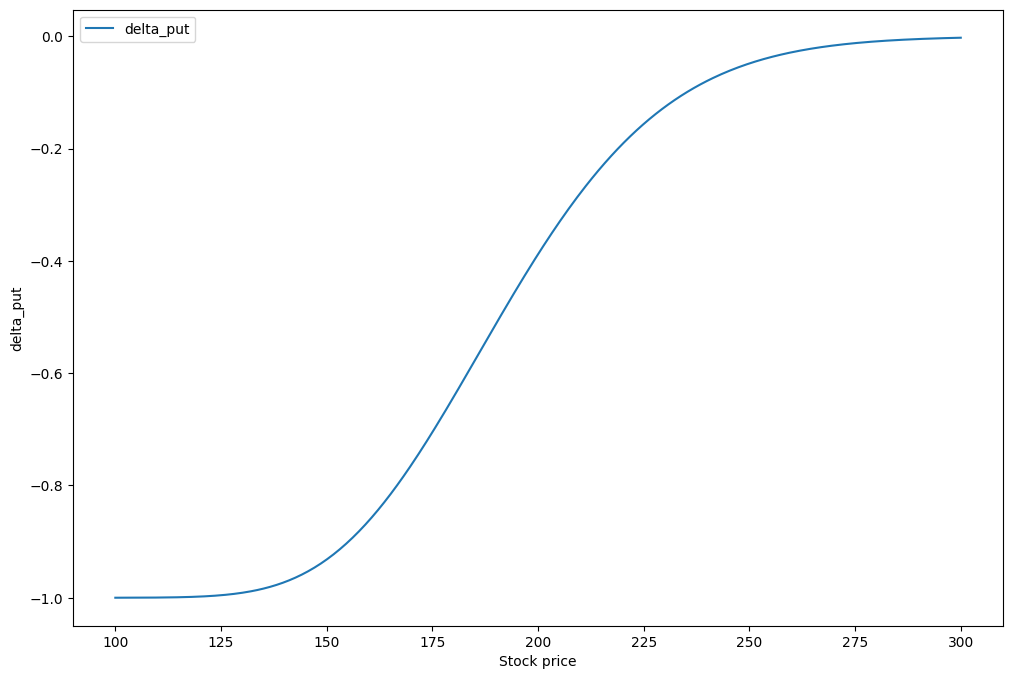

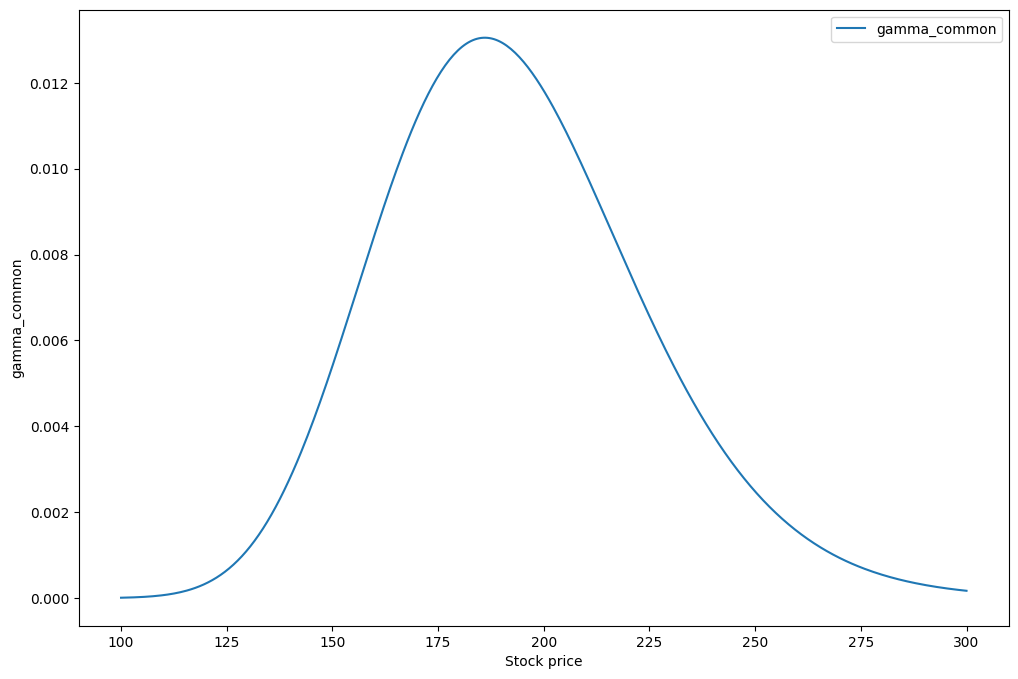

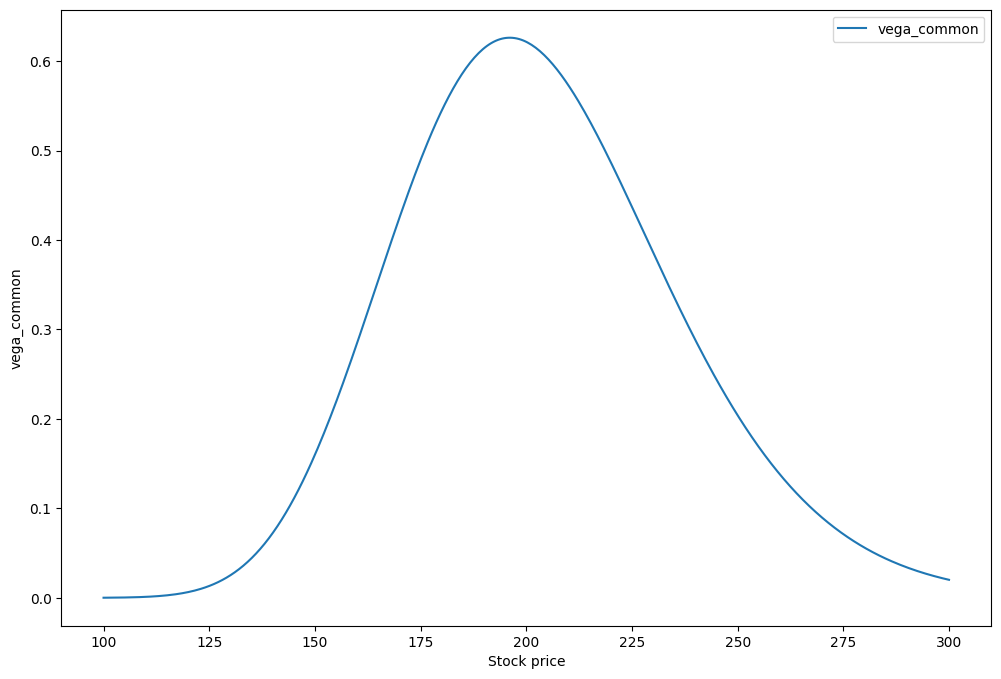

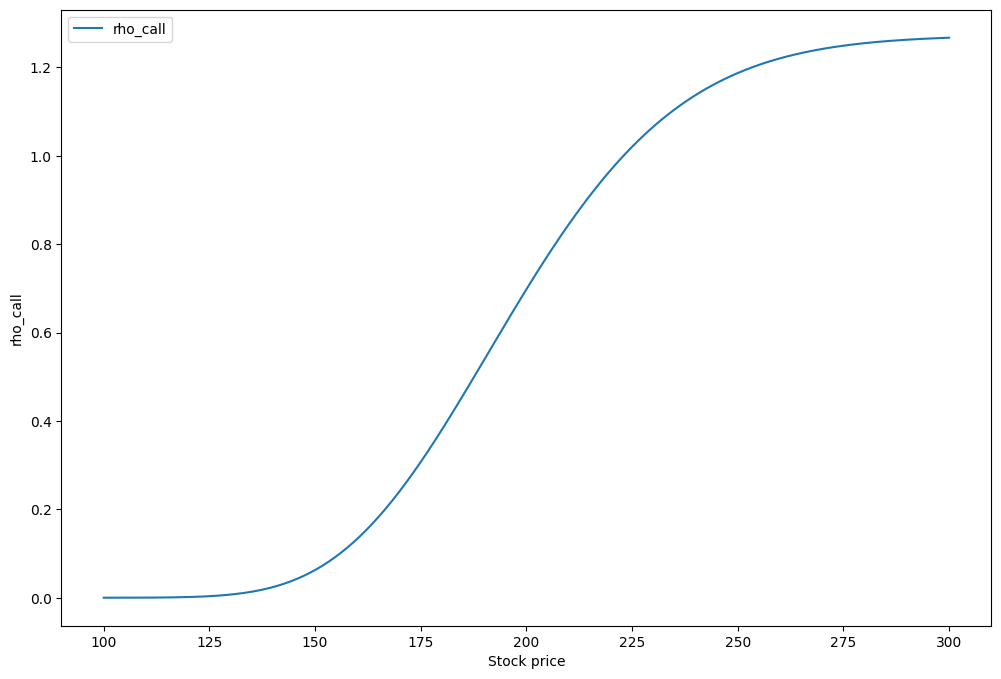

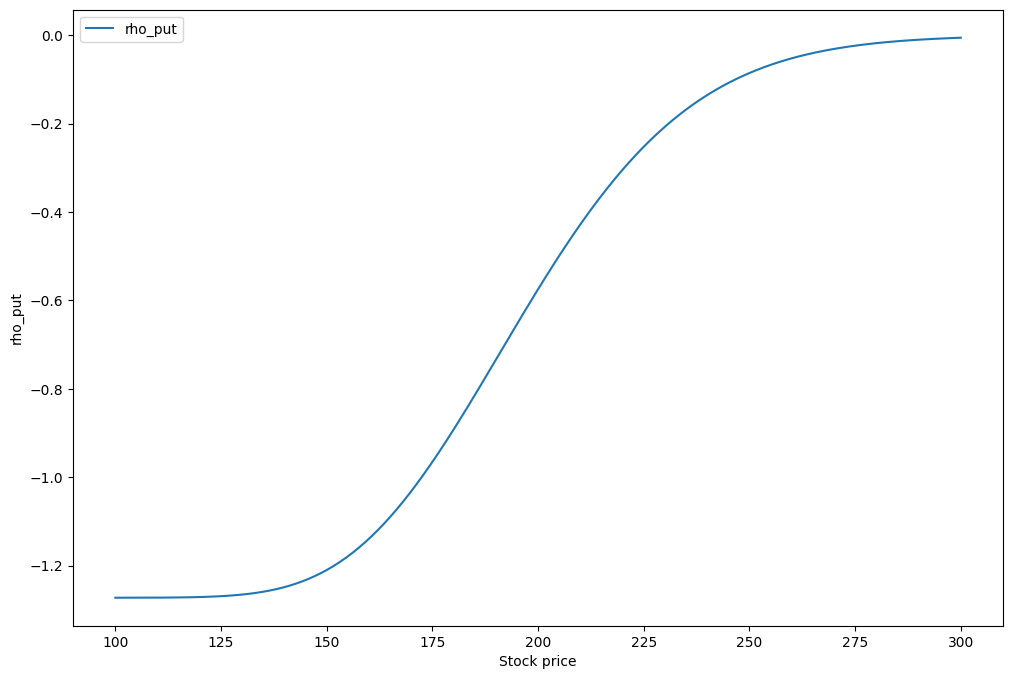

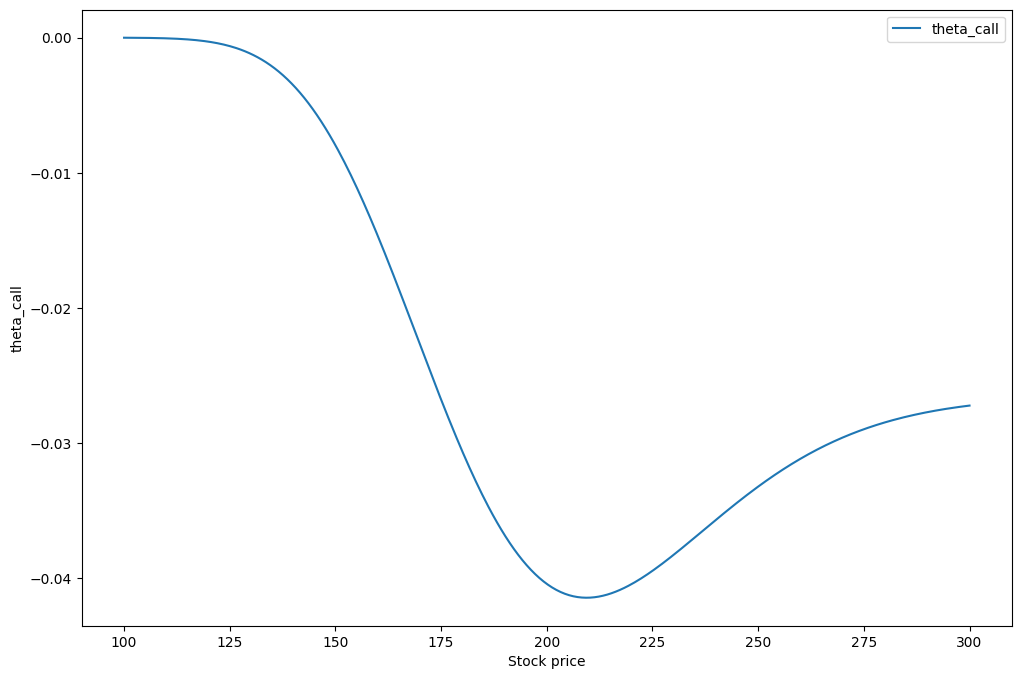

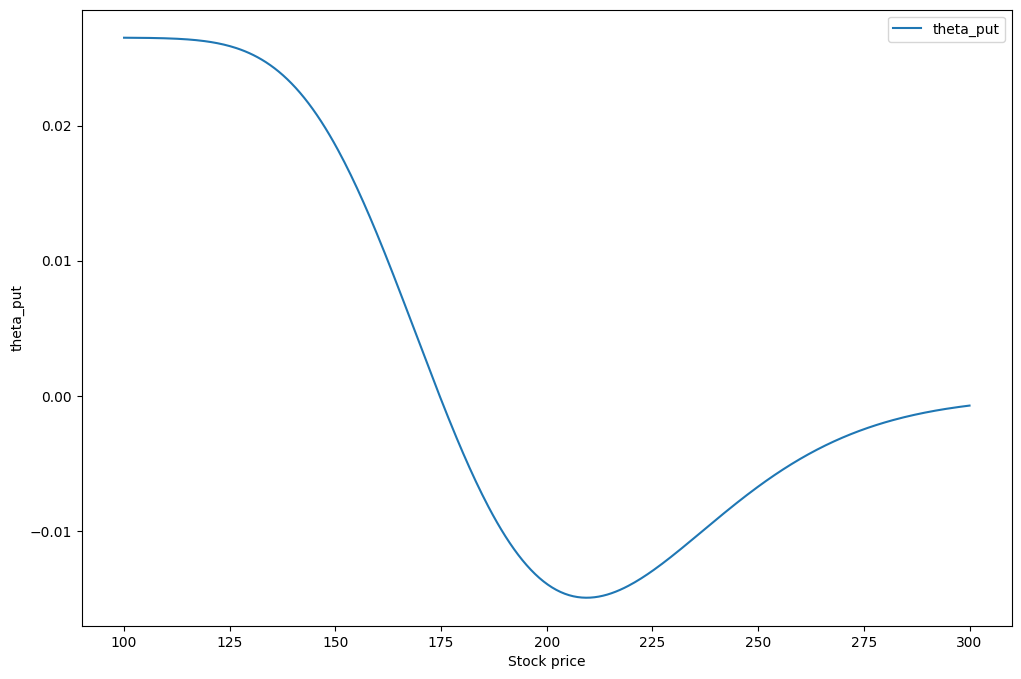

In [117]:
for i in df.columns:
    plt.figure(figsize=(12,8))
    plt.plot(df.index,df[i], label = f'{i}')
    plt.xlabel('Stock price')
    plt.ylabel(i)
    plt.legend()

<Axes: xlabel='S'>

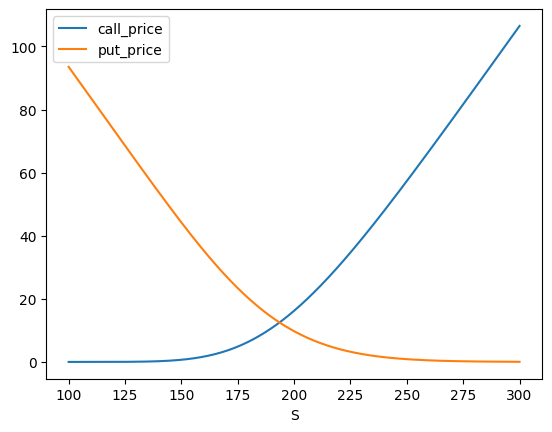

In [108]:
df[['call_price','put_price']].plot()
